<b><font size="6">|005a|Regression|Regression Metrics</font></b>

* **Author**: Dino Giovannoni
* **Date:**: 6-July-2024


**The Problem:** 

Understand and calculate some metrics to evaluate simple linear regression models and goodness of fit.

# Load libraries

There are three sets of libraries being loaded:

  + The libraries required for basic data manipulation and processing
    * numpy
    * pandas   
    * IPython.display that is used for displaying pandas DataFrames in a better format in Jupyter notebooks (rather than using `print`.)
  + The library for data visualization:
    * matplotlib 
  + The sklearn machine learning library, with
    * A function to perform linear regression.
    * A function for splitting data into training and test datasets.
    * Functions for calculating metrics.

In [21]:
import numpy as np 
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Some helper functions

We can wrap some of the functionality we will need into functions that we will use later.

## Linear regression prediction

We can package the basic steps required for constructing a linear regression model into a single function.
This function:

  * Initializes the sklearn linear regression model.
  * Performs a fit using the supplied input and output training data.
  * Performs a prediction with the supplied test data.

The function returns a tuple with the model and the predictions.

In [22]:
def Predict(X_train, Y_train, X_test):
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(X_train, Y_train)
    return (linear_regression_model, linear_regression_model.predict(X_test))

## Plotting functions

We will need to generate multiple plots in solving the problem. 
Rather than copy and pasting the plotting code each time, it is more convenient to package all that functionality into a single plotting function.
The following function will generate a scatter plot of the supplied x and y data.
If predictions are given (based on the same x-values), the prediction line is also plotted.

Note that the y-data must be supplied as a dictionary with two items: a y1 and y2.
i.e. of the form:

y_data = {"y1": y1_data, "y2": y2_data}

In [23]:
import math

def calculate_grid(total_plots, max_columns=3):
    """
    Calculate the number of rows and columns for a plot grid.
    
    Parameters:
    total_plots (int): The total number of plots.
    max_columns (int): The maximum number of columns (default is 3).
    
    Returns:
    tuple: A tuple containing the number of rows and columns.
    """
    if max_columns < 1:
        raise ValueError("The number of columns must be at least 1.")
    if max_columns > 3:
        raise ValueError("The number of columns must not exceed 3.")
    
    columns = min(total_plots, max_columns)
    rows = math.ceil(total_plots / columns)
    
    return rows, columns

# Example usage:
# total_plots = 10
# rows, columns = calculate_grid(total_plots)
# print(f"Rows: {rows}, Columns: {columns}")


In [24]:
def Plot_Scatter(x_data, y_data, predictions = None, title = None, ymax = None, errors = None, figsize=(12,4), max_columns = 3):
    # num_rows = 1
    # if ymax is None:
    #     ymax = np.round(max([y.max() for y in y_data.values()]))
    
    num_rows, num_columns = calculate_grid(len(y_data), max_columns)
    print(f'DATA={len(y_data)}')
    fig, axs = plt.subplots(num_rows, num_columns, figsize=figsize)    

    for yn, ax in zip(y_data, fig.axes):
        ax.set_title(yn)
        ax.set_xlabel('x')
        ax.set_ylabel(yn)        
        ax.scatter(x_data, y_data[yn], s=2)
        
        if predictions is not None:
            ax.plot(x_data, predictions[yn], color='red', linewidth=1.5)
        
        if errors is not None:
            ax.plot(x_data, predictions[yn] + errors[yn], color='green', linewidth = 1, linestyle='dotted')
            ax.plot(x_data, predictions[yn] - errors[yn], color='green', linewidth = 1, linestyle='dotted')
            
        ax.set_ylim([0, ymax])
        
    if title is not None:
        fig.suptitle(title) 

# Load the test data

Load the data from the csv file.

In [25]:
df = pd.read_csv('metric_test_data.csv')

## A sample of data

Start be viewing the first few rows using the `DataFrame.head()` method: 

In [26]:
display(df.head())

,x,y1,y2
0,1008.28,1137.88,2125.15
1,1018.04,1204.44,1321.04
2,1026.24,1295.66,907.97
3,1039.61,1242.54,786.18
4,1047.88,1195.06,1430.43


## The data-types

Use the `DataFrame.info()` method to get a list of the DataFrame columns and the data types in each of the columns.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y1      1000 non-null   float64
 2   y2      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [28]:
(size, Ncolumns) = df.shape
print(f'The data consists of {size} entries, with {Ncolumns} columns.')

The data consists of 1000 entries, with 3 columns.


## Visualize the data

Let's generate scatter plots of the raw data.

DATA=2


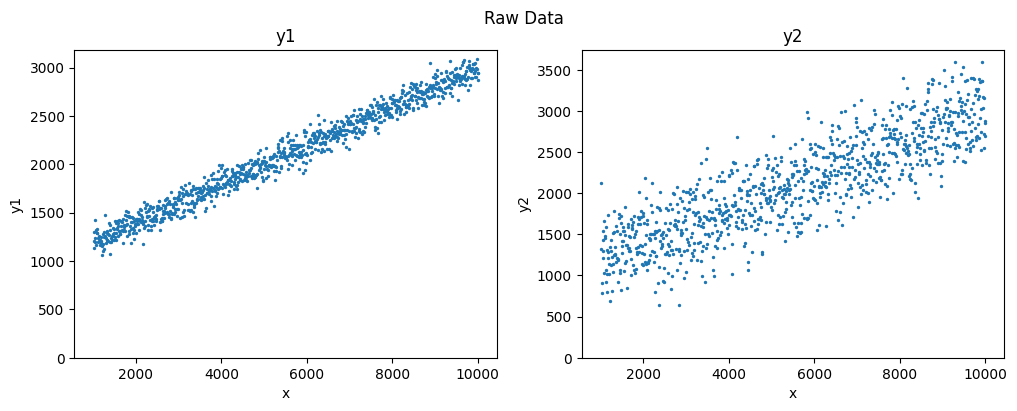

In [29]:
x = np.array(df['x'])
y1 = np.array(df['y1'])
y2 = np.array(df['y2'])
y = {'y1': y1, 'y2': y2}

Plot_Scatter(x, y, title = 'Raw Data')

# Perform linear regression

## Split the data

Split the raw data into the training and test data.
We will package the output data into dictionaries (for the plotting functions)

In [30]:
train, test = train_test_split(df, test_size=0.2)

x_train  = np.array(train['x']).reshape(-1,1)
x_test   = np.array(test['x']).reshape(-1,1)

y1_train = np.array(train['y1']).reshape(-1,1)
y2_train = np.array(train['y2']).reshape(-1,1)

y1_test = np.array(test['y1']).reshape(-1,1)
y2_test = np.array(test['y2']).reshape(-1,1)

y_train = {'y1': y1_train, 'y2': y2_train}
y_test  = {'y1': y1_test,  'y2': y2_test}

## Linear Regression Model

Construct the model from the training data for the two datasets (y1 and y2).

### Training data

First, construct the predictions just based on the training data:

In [31]:
y1_model, y1_train_pred = Predict(x_train, y1_train, x_train)
y2_model, y2_train_pred = Predict(x_train, y2_train, x_train)

y_train_pred  = {'y1': y1_train_pred,  'y2': y2_train_pred}

### Test data

We now calculate the test predictions from the test data, but using the regression model based on the training data.

In [32]:
y1_test_pred = y1_model.predict(x_test)
y2_test_pred = y2_model.predict(x_test)

y_test_pred  = {'y1': y1_test_pred,  'y2': y2_test_pred}

# Evaluation of solutions

## Evaluate training model

### Plotting the training model

DATA=2


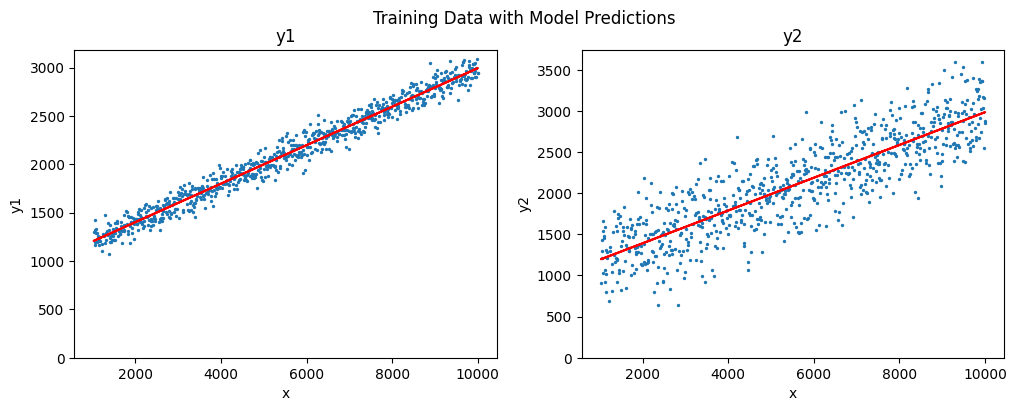

In [33]:
Plot_Scatter(x_train, y_train, y_train_pred,  title = 'Training Data with Model Predictions')

### Comparing the models

Let's compare the slopes and y-intercepts for the two linear regression lines:

In [34]:
print(f'The slopes are: y1: {np.round(y1_model.coef_[0][0],4)} y2: {np.round(y2_model.coef_[0][0],4)}')
print(f'The y-intercepts are: y1: {np.round(y1_model.intercept_[0],1)} y2: {np.round(y2_model.intercept_[0],1)}')

The slopes are: y1: 0.199 y2: 0.1993
The y-intercepts are: y1: 1003.2 y2: 992.7


The slopes are both approximately equal to 0.2 and the y-intercepts are both approximately equal to 1000.
To see that these two lines are almost the same, we can do a quick plot to confirm.

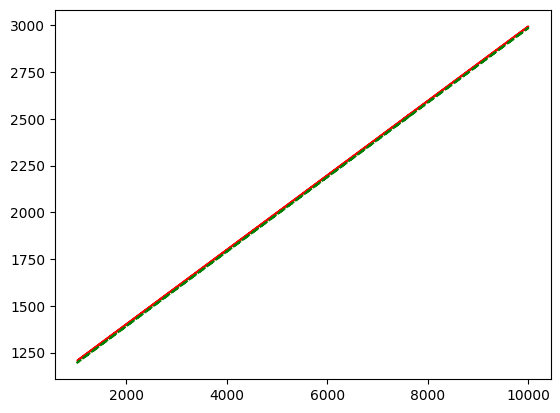

In [35]:
plt.plot(x_train, y_train_pred["y1"], color='red')
plt.plot(x_train, y_train_pred["y2"], color='green', linestyle='dashed')

### Calculating the metrics

In [36]:
train_mae =  {'y1': np.round(mean_absolute_error(y1_train, y1_train_pred),2), 
              'y2': np.round(mean_absolute_error(y2_train, y2_train_pred),2)
              }

train_mse =  {'y1': np.round(mean_squared_error(y1_train, y1_train_pred),2), 
              'y2': np.round(mean_squared_error(y2_train, y2_train_pred),2)
              }

train_rmse = {'y1': np.round(np.sqrt(train_mse['y1']),2), 
              'y2': np.round(np.sqrt(train_mse['y2']),2)
              }

print('COMPARISON OF METRICS')
print(f'Training MAE   : {train_mae}')
print(f'Training MSE   : {train_mse}')
print(f'Training RMSE  : {train_rmse}')

COMPARISON OF METRICS
Training MAE   : {'y1': 66.72, 'y2': 239.88}
Training MSE   : {'y1': 6904.21, 'y2': 91247.93}
Training RMSE  : {'y1': 83.09, 'y2': 302.07}


In all three cases, we see that the metrics for y2 are larger.
This is telling us that the y2 data is more spread out than the dataset for y1.
We can see this by including one of the errors in the plots.

DATA=2


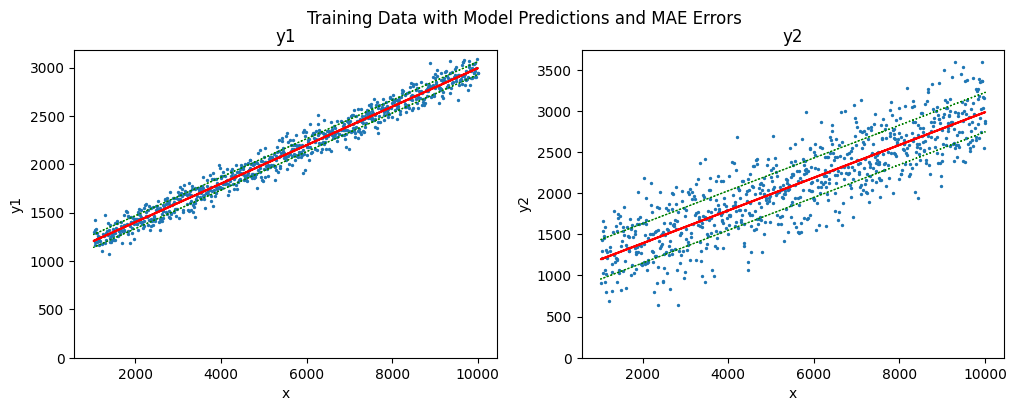

In [37]:
Plot_Scatter(x_train, y_train, y_train_pred,  errors = train_mae, title = 'Training Data with Model Predictions and MAE Errors')

Note that since the MAE and RMSE metrics are of the same units as the y-values, we can include those errors on the plot. 
We **cannot** do it with the MSE metric!

## Evaluate test model

In [38]:
test_mae =  {'y1': np.round(mean_absolute_error(y1_test, y1_test_pred), 2), 
             'y2': np.round(mean_absolute_error(y2_test, y2_test_pred), 2)
            }

test_mse =  {'y1': np.round(mean_squared_error(y1_test, y1_test_pred), 2), 
             'y2': np.round(mean_squared_error(y2_test, y2_test_pred), 2)
            }

test_rmse = {'y1': np.round(np.sqrt(test_mse['y1']), 2), 
             'y2': np.round(np.sqrt(test_mse['y2']), 2)
            }

print('COMPARISON OF METRICS')
print(f'Test Data MAE : {test_mae}')
print(f'Test Data MSE : {test_mse}')
print(f'Test Data RMSE: {test_rmse}')

COMPARISON OF METRICS
Test Data MAE : {'y1': 59.42, 'y2': 268.5}
Test Data MSE : {'y1': 5989.06, 'y2': 105844.25}
Test Data RMSE: {'y1': 77.39, 'y2': 325.34}


DATA=2


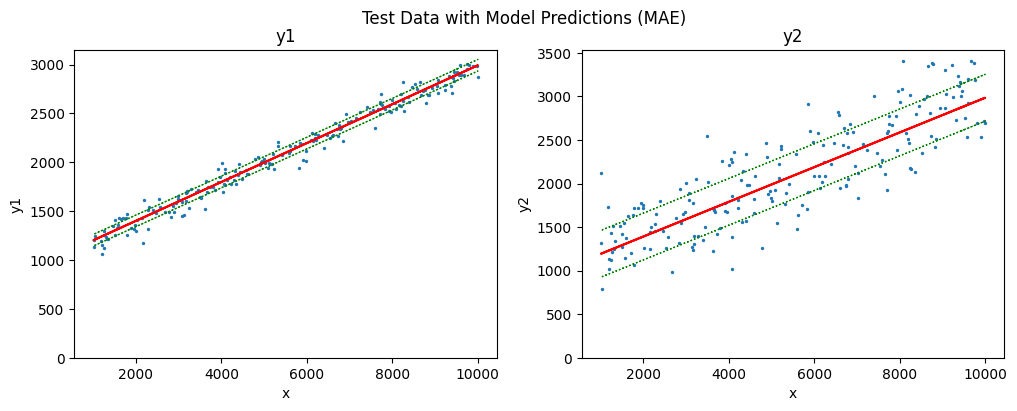

In [39]:
Plot_Scatter(x_test, y_test, y_test_pred, errors = test_mae,  title = 'Test Data with Model Predictions (MAE)')

## Tabulated comparison

We can package all the metrics into a pandas dataframe to help with comparing the values:

In [40]:
cases = ['Train', 'Test']
metrics = ['Mean Absolute Error','Mean Square Error','Root Mean Square Error']

index = pd.MultiIndex.from_tuples([(m, c) for c in cases for m in metrics])
data = [train_mae, train_mse, train_rmse, test_mae, test_mse, test_rmse]

df_metrics = (pd.DataFrame(data=data, index=index)
              .sort_index()
              .assign(Ratio  = lambda df_: np.round(df_["y2"]/df_["y1"],1))
             )

display(df_metrics)

y1         y2  Ratio
Mean Absolute Error    Test     59.42     268.50    4.5
                       Train    66.72     239.88    3.6
Mean Square Error      Test   5989.06  105844.25   17.7
                       Train  6904.21   91247.93   13.2
Root Mean Square Error Test     77.39     325.34    4.2
                       Train    83.09     302.07    3.6

Using a pandas dataframe also allows us to perform simple calculations in order to compare the metrics.
For example, we have calculated the ratio of the metrics for the different cases.
We can see that the MAE and RMSE ratios are approximately the same for the test and train cases.
The test ratios are higher than the train cases.

# Next steps

  * We have only presented three regression metrics. Are there others? Try to find out if there are others, and modify the code to calculate them as well.
  * Find other datasets and redo the analysis on those datasets.